**数据集说明**

四个数据集：
1. 客户个人信息.csv：包含客户的基本信息
2. 贷款申请信息.csv：包含客户申请贷款时获取的相关记录
3. 贷款历史记录.csv：包含客户的历史贷款申请记录
4. 还款历史记录.csv：包含客户的历史贷款还款记录

数据收集过程：在申请人提交本次申请时，系统将根据提交的时间节点进行快照，所有与时间相关的数据记录（如出生日期，就职日期，上次借款日期）将以快照生成日期为零点，计算两个时间节点间的天数差（如出生天数为-10000天则为在本次申请10000天前申请人出生。）

## 第一部分 数据导入和观测

**1. 环境搭建** 

In [1]:
# import packages 导入库，搭建环境
import numpy as np
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings 可以删除
import warnings
warnings.filterwarnings('ignore')
# 为了让matplotlib里显示中文字符
import matplotlib.font_manager as fm 
matplotlib.rcParams['font.family'] = 'Microsoft Yahei' # 设置字体

%matplotlib inline

**2.导入数据集**

In [2]:
data_customer = pd.read_csv('客户个人信息.csv')
data_customer.head() 

,本期ID,性别,出生天数,学历,婚姻状况,就业天数,职业类别,单位类别,年收入,家庭人数,子女人数
0,100004,男,-19046,高中/职高,未婚,-225,工人,政府部门,67500.0,1.0,0
1,100016,女,-13439,高中/职高,有配偶,-2717,工人,公司类别2,67500.0,2.0,0
2,100030,女,-19334,高中/职高,有配偶,-3494,清洁工,公司类别3,90000.0,2.0,0
3,100037,女,-12974,高中/职高,民事婚姻,-4404,工人,公司类别2,90000.0,2.0,0
4,100072,男,-7907,大学肄业,未婚,-1324,销售人员,贸易类别2,180000.0,1.0,0


In [3]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24661 entries, 0 to 24660
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   本期ID    24661 non-null  int64  
 1   性别      24661 non-null  object 
 2   出生天数    24661 non-null  int64  
 3   学历      24661 non-null  object 
 4   婚姻状况    24661 non-null  object 
 5   就业天数    24661 non-null  int64  
 6   职业类别    16988 non-null  object 
 7   单位类别    24661 non-null  object 
 8   年收入     24661 non-null  float64
 9   家庭人数    24660 non-null  float64
 10  子女人数    24661 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.1+ MB


In [4]:
data_credit = pd.read_csv('贷款申请信息.csv')
data_credit.head() 

,本期ID,是否逾期,是否有车,是否有房,总贷款额度,是否提供手机,是否提供雇主电话,是否提供工作电话,手机是否接通,是否提供座机,是否提供电子邮箱,近一小时征信查询次数,近一日征信查询次数,近一周征信查询次数,近一月征信查询次数,近一季度征信查询次数,近一年征信查询次数
0,291787,0,否,是,592560.0,1,1,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
1,187132,0,否,是,679500.0,1,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2,113892,0,否,是,675000.0,1,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,280634,1,否,否,450000.0,1,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
4,121672,0,否,是,314100.0,1,1,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   本期ID        13439 non-null  int64  
 1   是否逾期        13439 non-null  int64  
 2   是否有车        13439 non-null  object 
 3   是否有房        13439 non-null  object 
 4   总贷款额度       13439 non-null  float64
 5   是否提供手机      13439 non-null  int64  
 6   是否提供雇主电话    13439 non-null  int64  
 7   是否提供工作电话    13439 non-null  int64  
 8   手机是否接通      13439 non-null  int64  
 9   是否提供座机      13439 non-null  int64  
 10  是否提供电子邮箱    13439 non-null  int64  
 11  近一小时征信查询次数  11611 non-null  float64
 12  近一日征信查询次数   11611 non-null  float64
 13  近一周征信查询次数   11611 non-null  float64
 14  近一月征信查询次数   11611 non-null  float64
 15  近一季度征信查询次数  11611 non-null  float64
 16  近一年征信查询次数   11611 non-null  float64
dtypes: float64(7), int64(8), object(2)
memory usage: 1.7+ MB


In [6]:
data_application = pd.read_csv('历史贷款记录.csv')
data_application.head() 

,历史ID,本期ID,贷款类型,申请金额,贷款金额,商品价值,贷款目的,贷款状态
0,2393109,396305,现金贷款,180000.0,180000.0,180000.0,未知,通过
1,1543131,275707,现金贷款,229500.0,241920.0,229500.0,未知,通过
2,1676258,433469,现金贷款,247500.0,268083.0,247500.0,未知,通过
3,2600277,256517,现金贷款,0.0,0.0,NaN,未知,撤回
4,2076528,431383,商品贷款,26370.0,29983.5,26370.0,不适用,通过


In [7]:
data_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71563 entries, 0 to 71562
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   历史ID    71563 non-null  int64  
 1   本期ID    71563 non-null  int64  
 2   贷款类型    71563 non-null  object 
 3   申请金额    71563 non-null  float64
 4   贷款金额    71563 non-null  float64
 5   商品价值    55321 non-null  float64
 6   贷款目的    71563 non-null  object 
 7   贷款状态    71563 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 4.4+ MB


In [8]:
data_payment = pd.read_csv('历史还款记录.csv')
data_payment.head() 

,历史ID,本期ID,还款次序,还款期数,到期日天数,还款日天数,到期金额,还款金额
0,1456258,118323,1,6,-2619,-2619.0,4844.925,4844.925
1,2039177,190995,1,5,-1145,-1172.0,6966.090,6966.090
2,2671380,111601,1,7,-540,-548.0,8109.765,8109.765
3,1492101,159413,1,5,-967,-1006.0,5075.865,5075.865
4,1237335,114262,1,9,-2259,-2290.0,10492.020,10492.020


In [9]:
data_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935285 entries, 0 to 935284
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   历史ID    935285 non-null  int64  
 1   本期ID    935285 non-null  int64  
 2   还款次序    935285 non-null  int64  
 3   还款期数    935285 non-null  int64  
 4   到期日天数   935285 non-null  int64  
 5   还款日天数   935066 non-null  float64
 6   到期金额    935285 non-null  float64
 7   还款金额    935066 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 57.1 MB


**3.合并数据集**

将客户个人信息与贷款申请信息合并。历史记录的两张表数据量显著大于客户信息，存在一对多情况，故不做合并。

In [10]:
data = pd.merge(data_customer, data_credit, on = '本期ID', how = 'inner')
data.head()

,本期ID,性别,出生天数,学历,婚姻状况,就业天数,职业类别,单位类别,年收入,家庭人数,...,是否提供工作电话,手机是否接通,是否提供座机,是否提供电子邮箱,近一小时征信查询次数,近一日征信查询次数,近一周征信查询次数,近一月征信查询次数,近一季度征信查询次数,近一年征信查询次数
0,100030,女,-19334,高中/职高,有配偶,-3494,清洁工,公司类别3,90000.0,2.0,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100037,女,-12974,高中/职高,民事婚姻,-4404,工人,公司类别2,90000.0,2.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2,100072,男,-7907,大学肄业,未婚,-1324,销售人员,贸易类别2,180000.0,1.0,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,4.0
3,100085,男,-11187,高中/职高,有配偶,-2224,司机,公司类别1,157500.0,3.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100139,女,-13286,高中/职高,有配偶,-2305,NaN,公司类别3,157500.0,3.0,...,0,1,0,1,0.0,0.0,1.0,0.0,0.0,3.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13439 entries, 0 to 13438
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   本期ID        13439 non-null  int64  
 1   性别          13439 non-null  object 
 2   出生天数        13439 non-null  int64  
 3   学历          13439 non-null  object 
 4   婚姻状况        13439 non-null  object 
 5   就业天数        13439 non-null  int64  
 6   职业类别        9249 non-null   object 
 7   单位类别        13439 non-null  object 
 8   年收入         13439 non-null  float64
 9   家庭人数        13439 non-null  float64
 10  子女人数        13439 non-null  int64  
 11  是否逾期        13439 non-null  int64  
 12  是否有车        13439 non-null  object 
 13  是否有房        13439 non-null  object 
 14  总贷款额度       13439 non-null  float64
 15  是否提供手机      13439 non-null  int64  
 16  是否提供雇主电话    13439 non-null  int64  
 17  是否提供工作电话    13439 non-null  int64  
 18  手机是否接通      13439 non-null  int64  
 19  是否提供座机      13439 non-nul

## 第二部分 数据清洗和预处理

**1. 数据清洗（删除重复项）**

In [12]:
# 检查重复项
print('去重前数据维度:', data.shape)
duplicates = data.duplicated()
print('重复行数：', duplicates.sum())

去重前数据维度: (13439, 27)
重复行数： 162


In [13]:
data[duplicates]

,本期ID,性别,出生天数,学历,婚姻状况,就业天数,职业类别,单位类别,年收入,家庭人数,...,是否提供工作电话,手机是否接通,是否提供座机,是否提供电子邮箱,近一小时征信查询次数,近一日征信查询次数,近一周征信查询次数,近一月征信查询次数,近一季度征信查询次数,近一年征信查询次数
333,109138,女,-12490,本科及以上,离异,-128,NaN,公司类别2,135000.0,2.0,...,1,1,0,0,0.0,0.0,0.0,0.0,2.0,1.0
344,109343,男,-20788,本科及以上,有配偶,-2086,经理,公司类别3,202500.0,2.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
445,112436,女,-14516,高中/职高,有配偶,-1351,工人,邮政,90000.0,4.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,2.0
530,114130,女,-15261,大学肄业,离异,-1685,服务人员,餐饮,90000.0,1.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
600,115788,女,-10315,高中/职高,有配偶,-1209,核心员工,政府部门,103500.0,3.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13083,446420,女,-20367,高中/职高,民事婚姻,365243,NaN,未知,157500.0,2.0,...,0,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0
13101,446937,女,-15187,高中/职高,有配偶,-2610,销售人员,贸易类别6,112500.0,2.0,...,1,1,1,0,0.0,0.0,0.0,1.0,0.0,2.0
13283,452016,女,-10517,本科及以上,有配偶,-2811,工人,工业类别11,184500.0,2.0,...,0,1,1,0,0.0,0.0,0.0,1.0,0.0,5.0
13355,454081,男,-23145,高中/职高,有配偶,365243,NaN,未知,112500.0,2.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# 去重
data = data.drop_duplicates()
data.head()

,本期ID,性别,出生天数,学历,婚姻状况,就业天数,职业类别,单位类别,年收入,家庭人数,...,是否提供工作电话,手机是否接通,是否提供座机,是否提供电子邮箱,近一小时征信查询次数,近一日征信查询次数,近一周征信查询次数,近一月征信查询次数,近一季度征信查询次数,近一年征信查询次数
0,100030,女,-19334,高中/职高,有配偶,-3494,清洁工,公司类别3,90000.0,2.0,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100037,女,-12974,高中/职高,民事婚姻,-4404,工人,公司类别2,90000.0,2.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2,100072,男,-7907,大学肄业,未婚,-1324,销售人员,贸易类别2,180000.0,1.0,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,4.0
3,100085,男,-11187,高中/职高,有配偶,-2224,司机,公司类别1,157500.0,3.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100139,女,-13286,高中/职高,有配偶,-2305,NaN,公司类别3,157500.0,3.0,...,0,1,0,1,0.0,0.0,1.0,0.0,0.0,3.0


In [15]:
#打印去重后的数据维度,描述打印结果，填写代码。3分
print('去重后的数据维度:', data.shape)
duplicates = data.duplicated()
print('重复行数：', duplicates.sum())

去重后的数据维度: (13277, 27)
重复行数： 0


**2. 选取目标字段** 

In [16]:
list(data.columns) # 打印全部字段名称

['本期ID',
 '性别',
 '出生天数',
 '学历',
 '婚姻状况',
 '就业天数',
 '职业类别',
 '单位类别',
 '年收入',
 '家庭人数',
 '子女人数',
 '是否逾期',
 '是否有车',
 '是否有房',
 '总贷款额度',
 '是否提供手机',
 '是否提供雇主电话',
 '是否提供工作电话',
 '手机是否接通',
 '是否提供座机',
 '是否提供电子邮箱',
 '近一小时征信查询次数',
 '近一日征信查询次数',
 '近一周征信查询次数',
 '近一月征信查询次数',
 '近一季度征信查询次数',
 '近一年征信查询次数']

In [17]:
# 合并查询字段
data['征信查询次数'] = data['近一小时征信查询次数'] +\
                      data['近一日征信查询次数'] +\
                      data['近一周征信查询次数'] +\
                      data['近一月征信查询次数'] +\
                      data['近一季度征信查询次数'] +\
                      data['近一年征信查询次数']

In [18]:
# 选取目标字段
data = data[['本期ID',
             '性别',
             '出生天数',
             '学历',
             '婚姻状况',
             '就业天数',
             '职业类别',
             '年收入',
             '家庭人数',
             '是否有车',
             '是否有房',
             '总贷款额度',
             '征信查询次数',
             '是否逾期']]
data.head()

,本期ID,性别,出生天数,学历,婚姻状况,就业天数,职业类别,年收入,家庭人数,是否有车,是否有房,总贷款额度,征信查询次数,是否逾期
0,100030,女,-19334,高中/职高,有配偶,-3494,清洁工,90000.0,2.0,否,是,225000.0,0.0,0
1,100037,女,-12974,高中/职高,民事婚姻,-4404,工人,90000.0,2.0,否,否,199008.0,2.0,0
2,100072,男,-7907,大学肄业,未婚,-1324,销售人员,180000.0,1.0,否,否,1080000.0,4.0,0
3,100085,男,-11187,高中/职高,有配偶,-2224,司机,157500.0,3.0,否,是,755190.0,0.0,0
4,100139,女,-13286,高中/职高,有配偶,-2305,NaN,157500.0,3.0,否,否,302341.5,4.0,0


**3. 缺失项处理** 

In [19]:
# 查看缺失值比例
(data.isnull().sum() / data.shape[0]) * 100 

本期ID       0.000000
性别         0.000000
出生天数       0.000000
学历         0.000000
婚姻状况       0.000000
就业天数       0.000000
职业类别      31.129020
年收入        0.000000
家庭人数       0.000000
是否有车       0.000000
是否有房       0.000000
总贷款额度      0.000000
征信查询次数    13.579875
是否逾期       0.000000
dtype: float64

对于征信查询次数，由于其是连续值，且0有其实际意义，故我们采用特殊值-1进行填充

In [20]:
data['职业类别'].fillna('未知', inplace = True)
data['征信查询次数'].fillna(-1, inplace = True)

In [21]:
data.isnull().sum()  # 确认已经移除所有缺失值

本期ID      0
性别        0
出生天数      0
学历        0
婚姻状况      0
就业天数      0
职业类别      0
年收入       0
家庭人数      0
是否有车      0
是否有房      0
总贷款额度     0
征信查询次数    0
是否逾期      0
dtype: int64

**4. 数据格式检查和转换** 

In [22]:
# 检查 学历 的格式
data['学历'].unique()

array(['高中/职高', '大学肄业', '本科及以上', '初中及以下', '本科'], dtype=object)

In [23]:
data['学历'].replace('本科', '本科及以上', inplace = True)
data['学历'].unique()

array(['高中/职高', '大学肄业', '本科及以上', '初中及以下'], dtype=object)

In [24]:
# 检查 婚姻状况 的格式
data['婚姻状况'].unique()

array(['有配偶', '民事婚姻', '未婚', '离异', '丧偶'], dtype=object)

In [25]:
data['婚姻状况'].replace('民事婚姻', '有配偶', inplace = True)
data['婚姻状况'].unique()

array(['有配偶', '未婚', '离异', '丧偶'], dtype=object)

In [26]:
# 将布尔值转换为整数值
data['是否有车'].replace({'是': 1, '否': 0}, inplace = True)
data['是否有房'].replace({'是': 1, '否': 0}, inplace = True)

In [27]:
# 将天转换为年
data['年龄'] = data['出生天数'] / -365
data['工龄'] = data['就业天数'] / -365

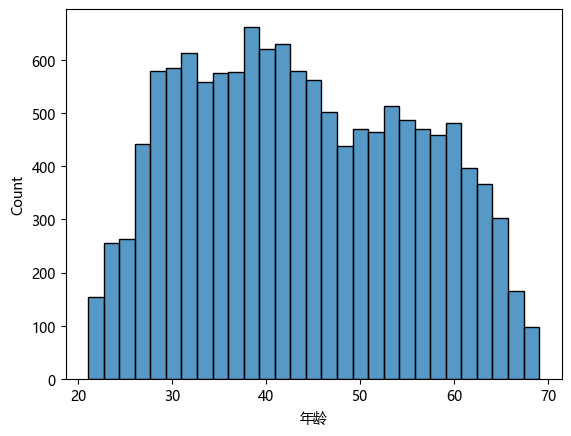

In [28]:
# 检查年龄分布，根据分布分箱
sns.histplot(data['年龄']);

<AxesSubplot: xlabel='年龄分箱', ylabel='Count'>

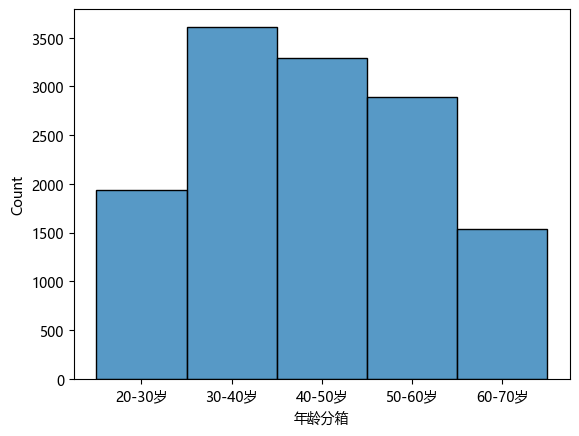

In [29]:
# 将年龄按每10岁分箱
data['年龄分箱'] = pd.cut(data['年龄'], bins = np.linspace(20, 70, num = 6), labels = ['20-30岁', '30-40岁', '40-50岁', '50-60岁', '60-70岁'])
sns.histplot(data['年龄分箱'])

In [30]:
# 去除无用字段
data.drop(columns=['年龄', '出生天数', '就业天数'], inplace=True)

**5. 特征工程** 

创建新特征`贷款收入比`

In [31]:
data['贷款收入比'] = data['总贷款额度'] / data['年收入']

**6. 异常值检查与处理** 

In [32]:
# 查看变量的分布
data.describe()

,本期ID,年收入,家庭人数,是否有车,是否有房,总贷款额度,征信查询次数,是否逾期,工龄,贷款收入比
count,13277.000000,1.327700e+04,13277.000000,13277.000000,13277.000000,1.327700e+04,13277.000000,13277.000000,13277.000000,13277.000000
mean,279154.771710,1.688998e+05,2.154176,0.339007,0.687731,5.943545e+05,2.045266,0.083829,-173.312686,3.916606
std,102692.714734,1.006715e+05,0.905084,0.473390,0.463436,3.977950e+05,3.302329,0.277142,385.825710,2.648340
min,100030.000000,2.700000e+04,1.000000,0.000000,0.000000,4.500000e+04,-1.000000,0.000000,-1000.665753,0.120521
25%,190497.000000,1.125000e+05,2.000000,0.000000,0.000000,2.700000e+05,0.000000,0.000000,0.786301,2.000000
50%,280261.000000,1.485000e+05,2.000000,0.000000,1.000000,5.084955e+05,2.000000,0.000000,3.284932,3.214286
75%,367880.000000,2.025000e+05,3.000000,1.000000,1.000000,8.086500e+05,3.000000,0.000000,7.564384,5.087050
max,456248.000000,3.600000e+06,14.000000,1.000000,1.000000,2.931660e+06,262.000000,1.000000,45.073973,35.477778


In [33]:
# 工资 贷款跨度过大，采用log转换
data['年收入log'] = np.log(data['年收入'])
data['总贷款额度log'] = np.log(data['总贷款额度'])
data[['年收入log', '总贷款额度log']].describe()

,年收入log,总贷款额度log
count,13277.000000,13277.000000
mean,11.912819,13.065400
std,0.488021,0.707515
min,10.203592,10.714418
25%,11.630709,12.506177
50%,11.908340,13.139212
75%,12.218495,13.603121
max,15.096444,14.891079


统计学中规定，将超出上下四分位值1.5IQR（上四分位值减下四分位值）的值定为异常值。根据此剔除异常值

In [34]:
# 征信查询次数选取小于7.5的数据
data = data[data['征信查询次数'].le(7.5)]
data['征信查询次数'].describe()

count    12893.000000
mean         1.810130
std          2.058846
min         -1.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: 征信查询次数, dtype: float64

In [35]:
# 贷款收入比选取小于12.537的数据
data = data[data['贷款收入比'].le(12.537)]
data['贷款收入比'].describe()

count    12744.000000
mean         3.791300
std          2.355156
min          0.120521
25%          2.000000
50%          3.185600
75%          5.000000
max         12.500000
Name: 贷款收入比, dtype: float64

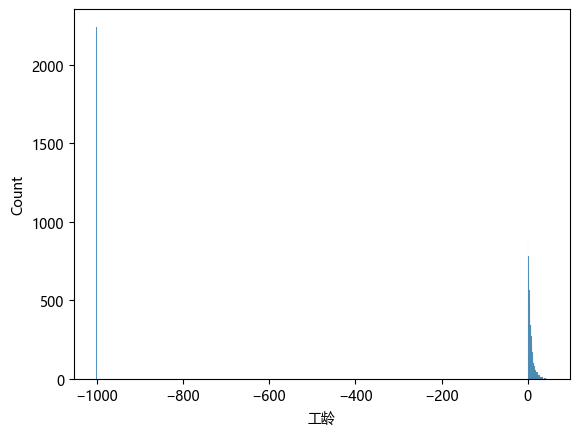

In [36]:
# 画图查看工龄分布
sns.histplot(data['工龄']);

由于-1000处数据量巨大，所以我们不对其进行处理，等后期分析时再进行探索

In [37]:
data.head()

,本期ID,性别,学历,婚姻状况,职业类别,年收入,家庭人数,是否有车,是否有房,总贷款额度,征信查询次数,是否逾期,工龄,年龄分箱,贷款收入比,年收入log,总贷款额度log
0,100030,女,高中/职高,有配偶,清洁工,90000.0,2.0,0,1,225000.0,0.0,0,9.572603,50-60岁,2.500000,11.407565,12.323856
1,100037,女,高中/职高,有配偶,工人,90000.0,2.0,0,0,199008.0,2.0,0,12.065753,30-40岁,2.211200,11.407565,12.201100
2,100072,男,大学肄业,未婚,销售人员,180000.0,1.0,0,0,1080000.0,4.0,0,3.627397,20-30岁,6.000000,12.100712,13.892472
3,100085,男,高中/职高,有配偶,司机,157500.0,3.0,0,1,755190.0,0.0,0,6.093151,30-40岁,4.794857,11.967181,13.534725
4,100139,女,高中/职高,有配偶,未知,157500.0,3.0,0,0,302341.5,4.0,0,6.315068,30-40岁,1.919629,11.967181,12.619312


## 第三部分 用户画像构建

性别比例

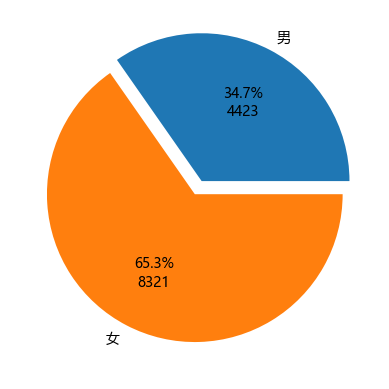

In [38]:
# 计算对应客户数量
male = data[data['性别'] == '男'].shape[0]
female = data[data['性别'] == '女'].shape[0]

# 总客户数
total = [male, female]

# 标签
label = ['男', '女']

# 定义百分比和人数格式
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, len(data) * x / 100)

# 绘制饼图
plt.pie(total, labels = label, autopct = fmt, explode = (0.1, 0));

年龄比例

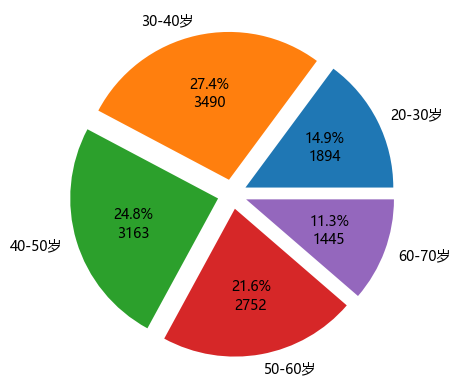

In [39]:
# 计算对应客户数量
age_2030 = data[data['年龄分箱'] == '20-30岁'].shape[0]
age_3040 = data[data['年龄分箱'] == '30-40岁'].shape[0]
age_4050 = data[data['年龄分箱'] == '40-50岁'].shape[0]
age_5060 = data[data['年龄分箱'] == '50-60岁'].shape[0]
age_6070 = data[data['年龄分箱'] == '60-70岁'].shape[0]

# 总客户数
total = [age_2030, age_3040, age_4050, age_5060, age_6070]

# 标签
label = ['20-30岁', '30-40岁', '40-50岁', '50-60岁', '60-70岁']

# 定义百分比和人数格式
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, len(data) * x / 100)

# 绘制饼图
plt.pie(total, labels = label, autopct = fmt, explode = (0.1, 0.1, 0.1, 0.1, 0.1));

婚姻状况

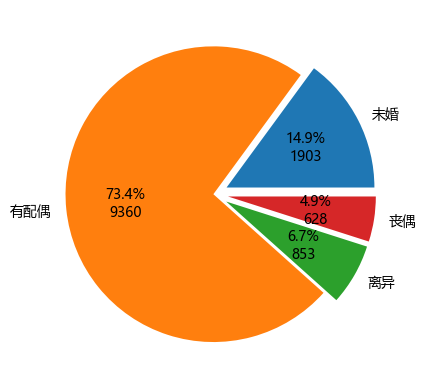

In [40]:
# 计算对应客户数量
sig = data[data['婚姻状况'] == '未婚'].shape[0]
mar = data[data['婚姻状况'] == '有配偶'].shape[0]
sep = data[data['婚姻状况'] == '离异'].shape[0]
wid = data[data['婚姻状况'] == '丧偶'].shape[0]

# 总客户数
total = [sig, mar, sep, wid]

# 标签
label = ['未婚', '有配偶', '离异', '丧偶']

# 定义百分比和人数格式
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, len(data) * x / 100)

# 绘制饼图
plt.pie(total, labels = label, autopct = fmt, explode = (0.1, 0, 0.1, 0.1));

是否有车

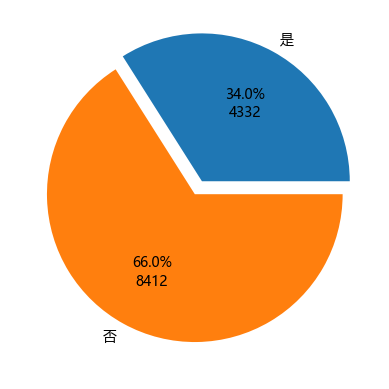

In [41]:
# 计算对应客户数量
car1 = data[data['是否有车'] == 1].shape[0]
car0 = data[data['是否有车'] == 0].shape[0]

# 总客户数
total = [car1, car0]

# 标签
label = ['是', '否']

# 定义百分比和人数格式
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, len(data) * x / 100)

# 绘制饼图
plt.pie(total, labels = label, autopct = fmt, explode = (0.1, 0));

是否有房

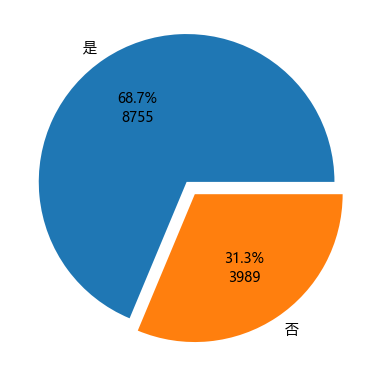

In [42]:
# 计算对应客户数量
rel1 = data[data['是否有房'] == 1].shape[0]
rel0 = data[data['是否有房'] == 0].shape[0]

# 总客户数
total = [rel1, rel0]

# 标签
label = ['是', '否']

# 定义百分比和人数格式
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, len(data) * x / 100)

# 绘制饼图
plt.pie(total, labels = label, autopct = fmt, explode = (0.1, 0));

正常工龄

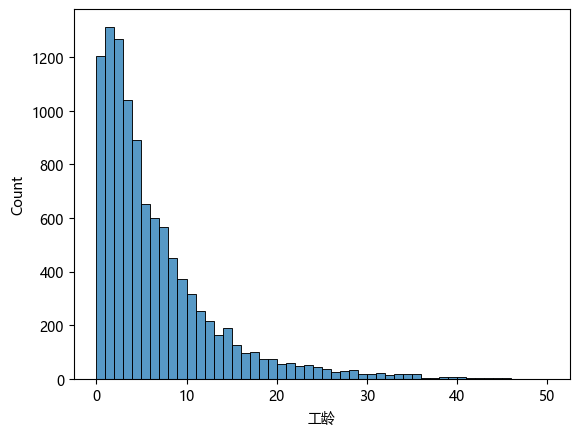

In [43]:
sns.histplot(data['工龄'], binwidth = 1, binrange = (0, 50));

年收入

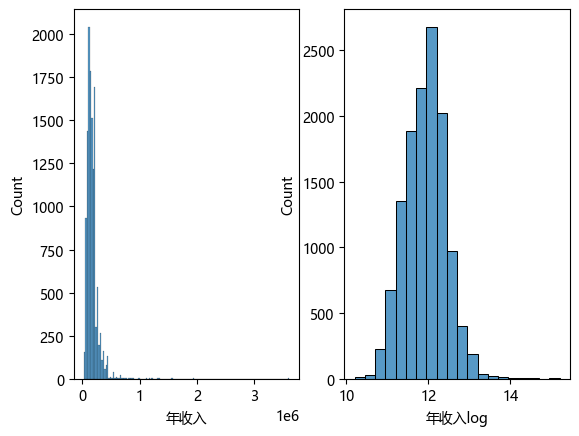

In [44]:
fig, ax = plt.subplots(1, 2)
sns.histplot(ax = ax[0], x = data['年收入'], binwidth = 25000)
sns.histplot(ax = ax[1], x = data['年收入log'], binwidth = 0.25);

总贷款

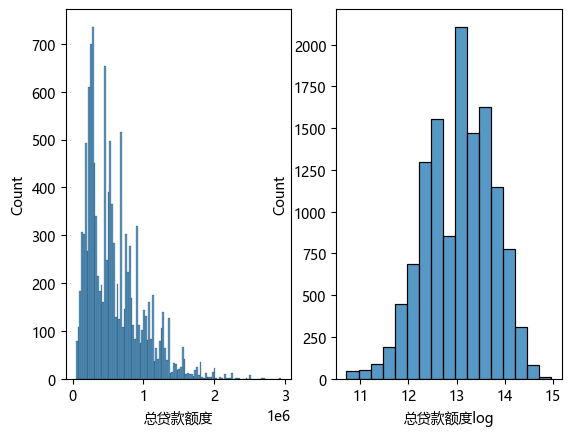

In [45]:
fig, ax = plt.subplots(1, 2)
sns.histplot(ax = ax[0], x = data['总贷款额度'], binwidth = 25000)
sns.histplot(ax = ax[1], x = data['总贷款额度log'], binwidth = 0.25);

贷款收入比

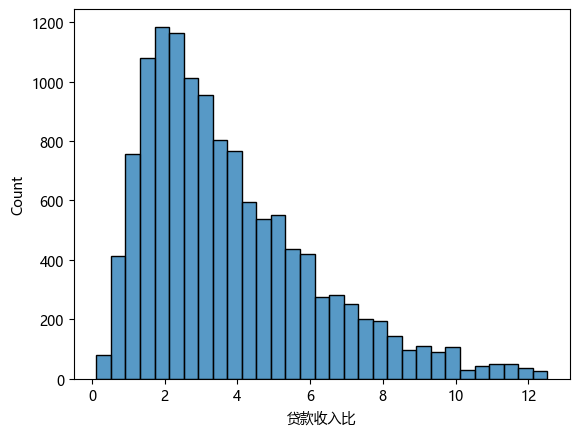

In [46]:
sns.histplot(data['贷款收入比'], binwidth = 0.4);

家庭人数

<AxesSubplot: xlabel='家庭人数', ylabel='Count'>

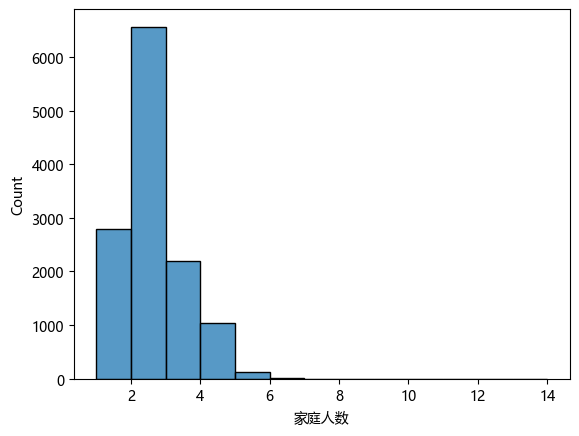

In [47]:
sns.histplot(data['家庭人数'], binwidth = 1)

征信查询次数

<AxesSubplot: xlabel='征信查询次数', ylabel='Count'>

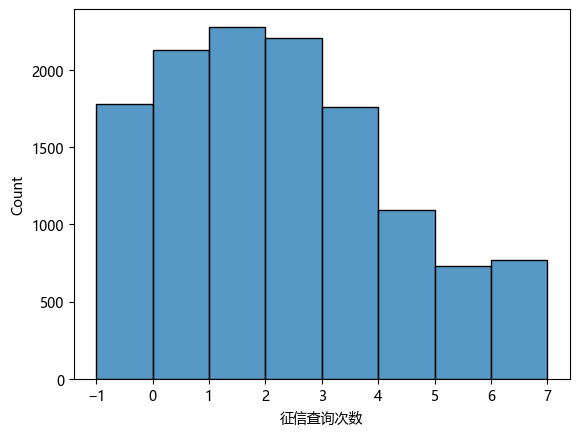

In [48]:
sns.histplot(data['征信查询次数'], binwidth = 1)

## 第四部分 探索性数据分析

**1. 整体逾期分析** 

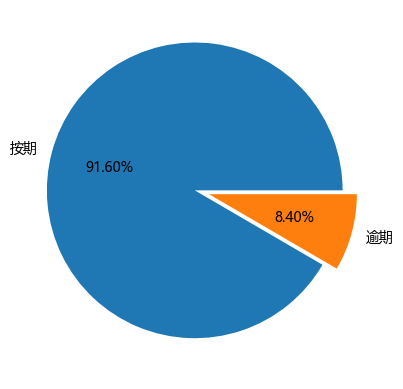

In [49]:
# 计算对应客户数量
ontime = data[data['是否逾期'] == 0].shape[0]
default = data[data['是否逾期'] == 1].shape[0]

# 总客户数
total = [ontime, default]

# 标签
label = ['按期', '逾期']

# 绘制饼图
plt.pie(total, labels = label, autopct = '%1.2f%%', explode = (0.1, 0));

**2. 类别变量分析** 

性别

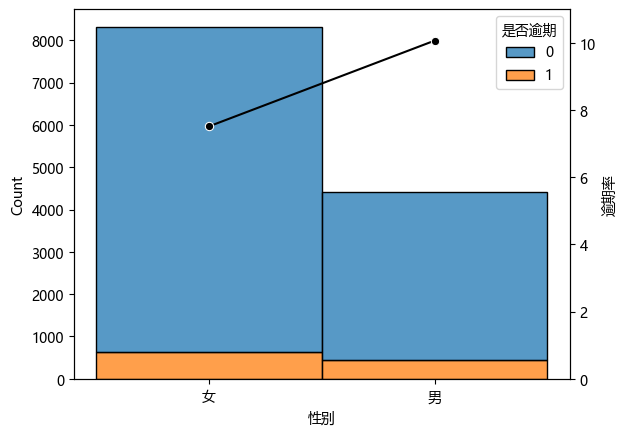

In [50]:
gender_plt = (data[['是否逾期', '性别']].groupby('性别').mean() * 100).reset_index().rename(columns = {'是否逾期': '逾期率'})
sns.histplot(x = '性别', hue = '是否逾期', data = data, multiple = 'stack')
plt.gca().twinx()
sns.lineplot(x = '性别', y = '逾期率', data = gender_plt, color = 'black', marker = 'o')
plt.ylim([0, 11]);

男性逾期率显著高于女性

是否有车

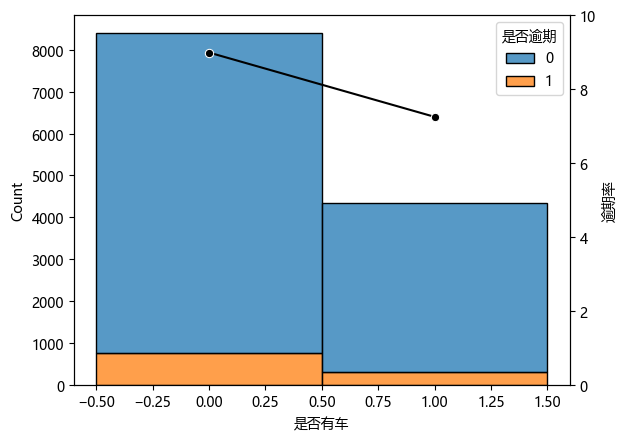

In [51]:
car_plt = (data[['是否逾期', '是否有车']].groupby('是否有车').mean() * 100).reset_index().rename(columns = {'是否逾期': '逾期率'})
sns.histplot(x = '是否有车', hue = '是否逾期', data = data, binrange = (-0.5, 1.5), binwidth = 1, multiple = 'stack')
plt.gca().twinx()
sns.lineplot(x = '是否有车', y = '逾期率', data = car_plt, color = 'black', marker = 'o')
plt.ylim([0, 10]);

无车逾期率略高于有车

是否有房

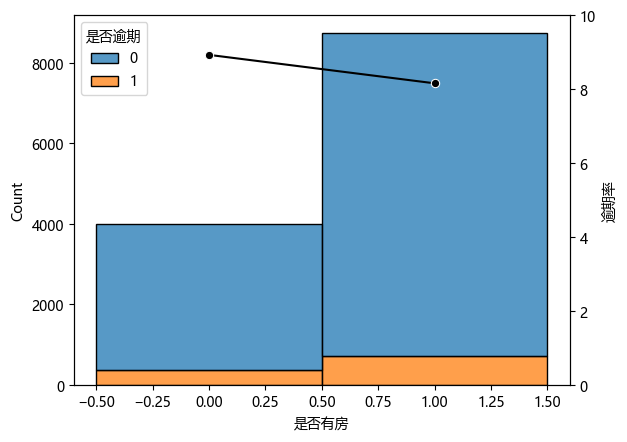

In [52]:
car_plt = (data[['是否逾期', '是否有房']].groupby('是否有房').mean() * 100).reset_index().rename(columns = {'是否逾期': '逾期率'})
sns.histplot(x = '是否有房', hue = '是否逾期', data = data, binrange = (-0.5, 1.5), binwidth = 1, multiple = 'stack')
plt.gca().twinx()
sns.lineplot(x = '是否有房', y = '逾期率', data = car_plt, color = 'black', marker = 'o')
plt.ylim([0, 10]);

无房逾期率略高，但不显著

年龄

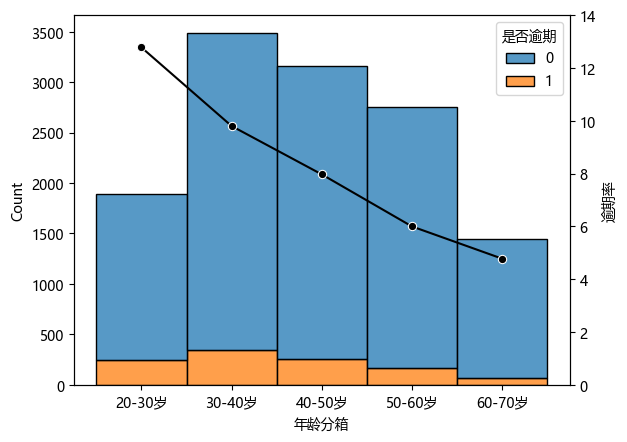

In [53]:
age_plt = (data[['是否逾期', '年龄分箱']].groupby('年龄分箱').mean() * 100).reset_index().rename(columns = {'是否逾期': '逾期率'})
sns.histplot(x = '年龄分箱', hue = '是否逾期', data = data, multiple = 'stack')
plt.gca().twinx()
sns.lineplot(x = '年龄分箱', y = '逾期率', data = age_plt, color = 'black', marker = 'o')
plt.ylim([0, 14]);

随着年龄增长，逾期率逐渐下降

学历

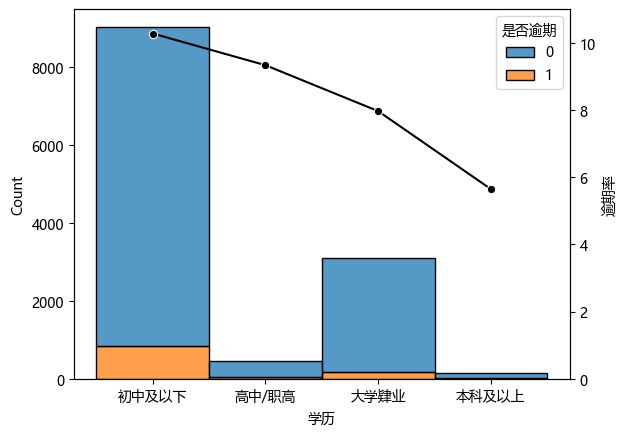

In [54]:
edu_plt = (data[['是否逾期', '学历']].groupby('学历').mean() * 100).reset_index().rename(columns = {'是否逾期': '逾期率'})
edu_order = ['初中及以下', '高中/职高', '大学肄业', '本科及以上']
edu_plt['学历'] = pd.Categorical(edu_plt['学历'], categories = edu_order)
sns.histplot(x = '学历', hue = '是否逾期', data = data, multiple = 'stack')
plt.gca().twinx()
sns.lineplot(x = '学历', y = '逾期率', data = edu_plt, color = 'black', marker = 'o')
plt.ylim([0, 11]);

随着学历的上升，逾期率逐渐下降

婚姻状况

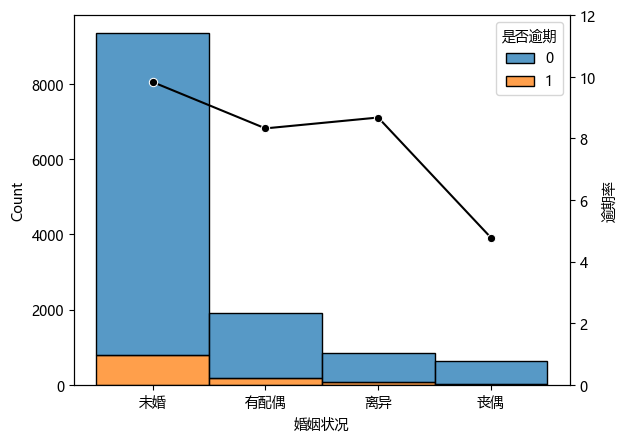

In [55]:
mar_plt = (data[['是否逾期', '婚姻状况']].groupby('婚姻状况').mean() * 100).reset_index().rename(columns = {'是否逾期': '逾期率'})
mar_order = ['未婚', '有配偶', '离异', '丧偶']
mar_plt['婚姻状况'] = pd.Categorical(mar_plt['婚姻状况'], categories = mar_order)
sns.histplot(x = '婚姻状况', hue = '是否逾期', data = data, multiple = 'stack')
plt.gca().twinx()
sns.lineplot(x = '婚姻状况', y = '逾期率', data = mar_plt, color = 'black', marker = 'o')
plt.ylim([0, 12]);

未婚有较高的逾期率，其次是离异、有配偶，丧偶逾期率显著低于其他

职业

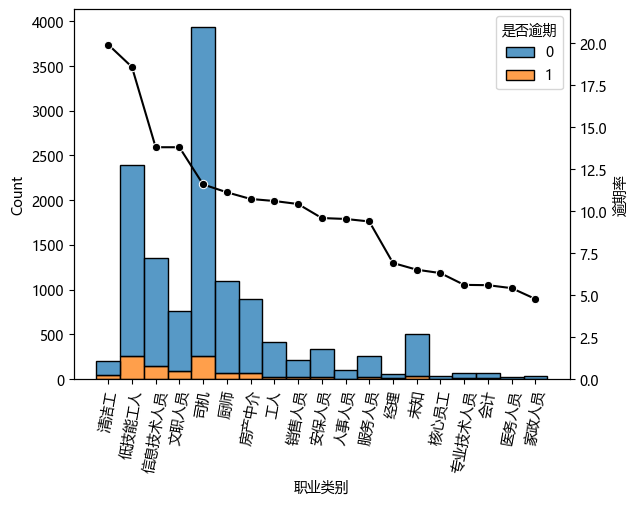

In [56]:
ocu_plt = (data[['是否逾期', '职业类别']].groupby('职业类别').mean() * 100).reset_index().rename(columns = {'是否逾期': '逾期率'})
ocu_plt.sort_values('逾期率', inplace = True, ascending = False)
sns.histplot(x = '职业类别', hue = '是否逾期', data = data, multiple = 'stack')
plt.xticks(rotation = 80)
plt.gca().twinx()
sns.lineplot(x = '职业类别', y = '逾期率', data = ocu_plt, color = 'black', marker = 'o')
plt.ylim(0, 22);

清洁工和低技能工人逾期率显著高于其他类别，信息技术人员和文职人员略高于其他类别。经理、未知类别、家政人员、核心员工、专业技术人员、会计、医务人员显著低于其他类别

工龄

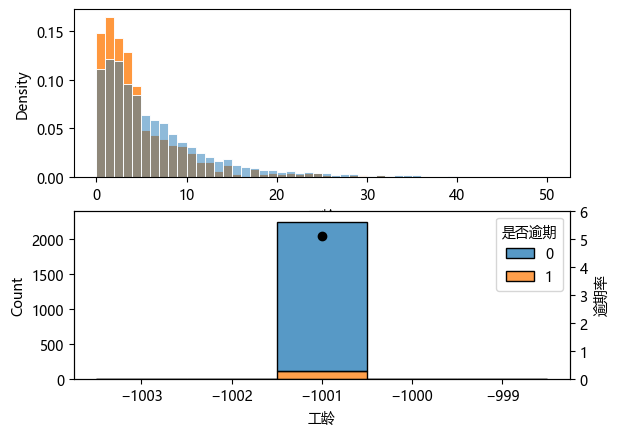

In [57]:
# 正常工龄
data_0 = data[data['是否逾期'].eq(0)]
data_1 = data[data['是否逾期'].eq(1)]
fig, ax = plt.subplots(2, 1)
sns.histplot(ax = ax[0], x = data_1['工龄'], alpha = 0.8, color = 'tab:orange', edgecolor = 'w', stat = 'density', binwidth = 1, binrange = (0, 50))
sns.histplot(ax = ax[0], x = data_0['工龄'], alpha = 0.5, color = 'tab:blue', edgecolor = 'w', stat = 'density', binwidth = 1, binrange = (0, 50))
plt.ylim([0, 0.18])
# 异常工龄
exp_plt = data[data['工龄'] < -1000]
exp = np.mean(exp_plt['是否逾期']) * 100
sns.histplot(ax = ax[1], x = '工龄', hue = '是否逾期', data = data, binrange = (-1003.5, -998.5), binwidth = 1, multiple = 'stack')
plt.ylim([0, 2400]);
ax[1].twinx()
plt.plot(-1001, exp, 'ko')
plt.ylabel('逾期率')
plt.ylim([0, 6]);

工龄小于5年，逾期群体在该区间的占比更大；工龄大于五年，按期群体在该区间的占比更大。对于异常工龄，其逾期率低于整体逾期率。

收入

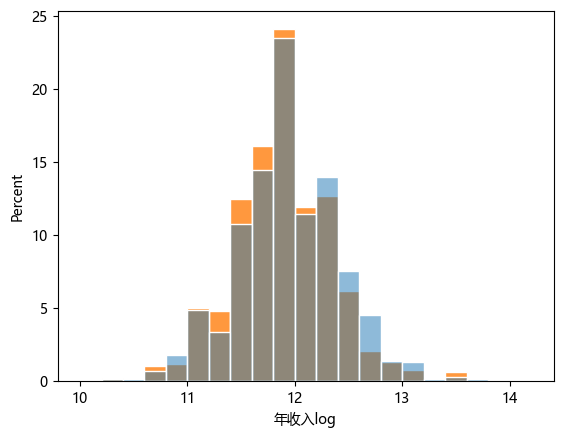

In [58]:
sns.histplot(data_1['年收入log'], alpha = 0.8, color = 'tab:orange', edgecolor = 'w', stat = 'percent', binwidth = 0.2, binrange = (10, 14))
sns.histplot(data_0['年收入log'], alpha = 0.5, color = 'tab:blue', edgecolor = 'w', stat = 'percent', binwidth = 0.2, binrange = (10, 14));

年收入log小于12.2，逾期群体在该区间的占比更大；年收入log大于12.2，按期群体在该区间的占比更大。

<AxesSubplot: xlabel='家庭人数', ylabel='Percent'>

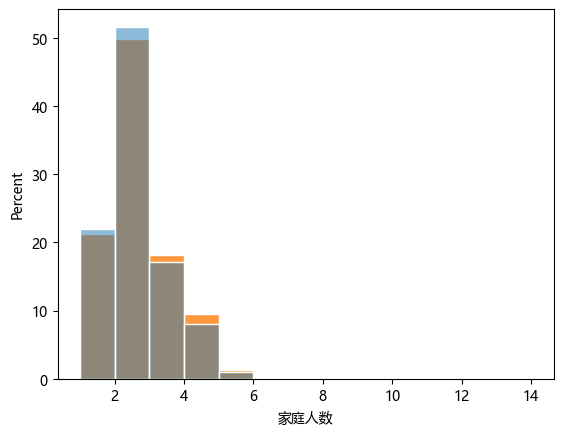

In [59]:
sns.histplot(data_1['家庭人数'], alpha = 0.8, color = 'tab:orange', edgecolor = 'w', stat = 'percent', binwidth = 1)
sns.histplot(data_0['家庭人数'], alpha = 0.5, color = 'tab:blue', edgecolor = 'w', stat = 'percent', binwidth = 1)

家庭人数小于2，按期群体在该区间的占比更大；家庭人数大于2，逾期群体在该区间的占比更大。

贷款收入比

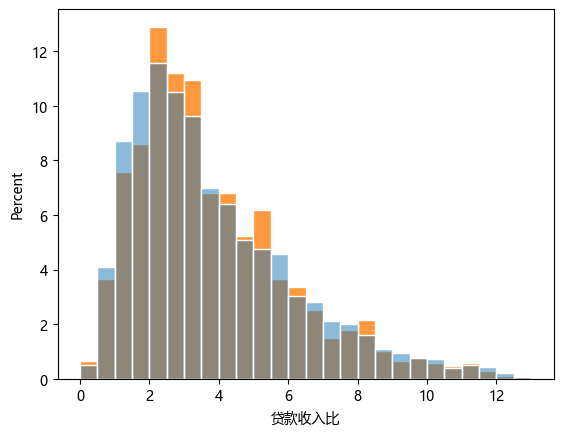

In [60]:
sns.histplot(data_1['贷款收入比'], alpha = 0.8, color = 'tab:orange', edgecolor = 'w', stat = 'percent', binwidth = 0.5, binrange = (0, 13))
sns.histplot(data_0['贷款收入比'], alpha = 0.5, color = 'tab:blue', edgecolor = 'w', stat = 'percent', binwidth = 0.5, binrange = (0, 13));

贷款收入比无明显趋势。仅能观察到在0-2区间内按期群体在该区间的占比更大和2-5.5区间内逾期群体在该区间的占比更大。

## 第四部分 风险指标分析

查询次数

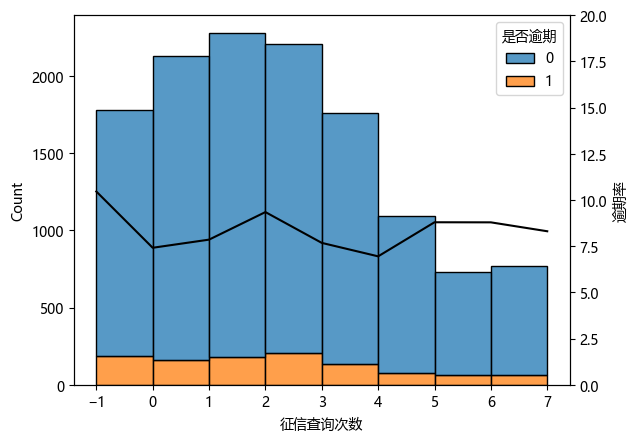

In [61]:
inq_plt = (data[['是否逾期', '征信查询次数']].groupby('征信查询次数').mean() * 100).reset_index().rename(columns = {'是否逾期': '逾期率'})
sns.histplot(x = '征信查询次数', hue = '是否逾期', data = data, binwidth = 1, multiple = 'stack')
plt.gca().twinx()
sns.lineplot(x = '征信查询次数', y = '逾期率', data = inq_plt, color = 'black')
plt.ylim(0, 20);

征信查询次数与逾期率无明显关系。查询次数为-1的群体逾期率略大于整体逾期率。

历史借贷次数

In [126]:
# 将历史借贷记录聚合计次
his_agg = (data_application[['本期ID', '历史ID']].groupby('本期ID').count()).reset_index().rename(columns = {'历史ID': '历史借贷次数'})
# 将历史借贷计次与逾期数据合并
his_data = pd.merge(data[['本期ID', '是否逾期']], his_agg, on = '本期ID', how = 'left')
# 没有历史借贷记录的申请人合并后会出现空值，用0填入
his_data['历史借贷次数'].fillna(0, inplace = True)
his_data.describe()

,本期ID,是否逾期,历史借贷次数
count,12744.000000,12744.000000,12744.000000
mean,279408.699937,0.083961,2.786174
std,102704.154444,0.277340,2.659616
min,100030.000000,0.000000,0.000000
25%,190870.000000,0.000000,1.000000
50%,280738.000000,0.000000,2.000000
75%,368121.500000,0.000000,4.000000
max,456248.000000,1.000000,30.000000


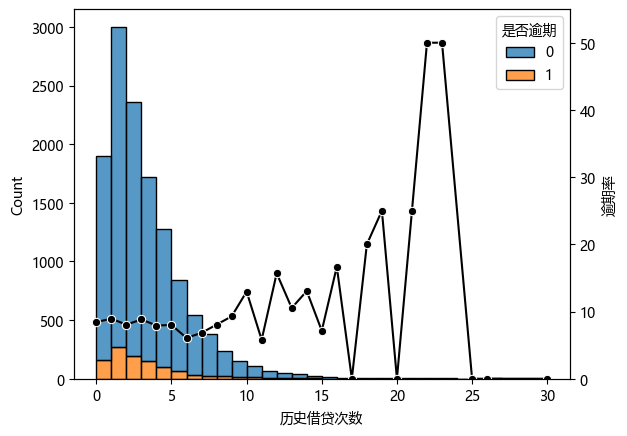

In [127]:
his_plt = (his_data[['是否逾期', '历史借贷次数']].groupby('历史借贷次数').mean() * 100).reset_index().rename(columns = {'是否逾期': '逾期率'})
sns.histplot(x = '历史借贷次数', hue = '是否逾期', data = his_data, binwidth = 1, multiple = 'stack')
plt.gca().twinx()
sns.lineplot(x = '历史借贷次数', y = '逾期率', data = his_plt, color = 'black', marker = 'o')
plt.ylim([0, 55]);

随着历史借贷次数增加，逾期率呈先下降后上升趋势。但在10次后出现大量波动，可能与数据量偏小相关。

历史违约

In [64]:
# 将历史还款信息按到期日，还款日，到期金额，还款金额聚合
def_agg = data_payment.groupby(['本期ID', '历史ID', '还款期数'], as_index = False)\
                      .agg({'到期日天数': 'mean',
                            '还款日天数': 'max',
                            '到期金额': 'mean', 
                            '还款金额': 'sum'})
def_agg.head()

,本期ID,历史ID,还款期数,到期日天数,还款日天数,到期金额,还款金额
0,100004,1564014,1,-784.0,-795.0,5357.250,5357.250
1,100004,1564014,2,-754.0,-763.0,5357.250,5357.250
2,100004,1564014,3,-724.0,-727.0,10573.965,10573.965
3,100016,1251047,1,-1017.0,-1032.0,14480.460,14480.460
4,100016,1251047,2,-987.0,-1002.0,14480.460,14480.460


In [70]:
# 求出逾期天数
def_agg['逾期天数'] = def_agg['还款日天数'] - def_agg['到期日天数']
# 求出逾期金额
def_agg['逾期金额'] = def_agg['还款金额'] - def_agg['到期金额']
# 将提前还款的记录逾期天数设为0
def_agg['逾期天数'][def_agg['逾期天数'] < 0] = 0
# 将提前还款的记录逾期金额设为0
def_agg['逾期金额'][def_agg['逾期金额'] < 0] = 0
# 若到期日天数在一个月内且还款天数为空，则为尚未到期且未还款，清除逾期数据
def_agg['逾期天数'][(def_agg['到期日天数']> -30) & (def_agg['还款日天数'].isnull())] = 0
# 若到期日天数为空，则为已提前还清欠款，清除逾期数据
def_agg['逾期天数'][def_agg['逾期天数'].isna()] = 0
# 聚合求出总逾期天数
def_data = def_agg.groupby('本期ID', as_index = False)\
                  .agg({'逾期天数': 'sum', '逾期金额': 'sum'})\
                  .rename(columns = {'逾期天数': '合计逾期天数', '逾期金额': '合计逾期金额'})
# 将逾期数据与客户信息合并
def_data = pd.merge(data[['本期ID', '是否逾期']], def_data, on = '本期ID', how = 'left')
def_data.describe()

,本期ID,是否逾期,合计逾期天数,合计逾期金额
count,12744.000000,12744.000000,12089.000000,1.208900e+04
mean,279408.699937,0.083961,39.019439,4.868773e+04
std,102704.154444,0.277340,162.214752,2.152956e+05
min,100030.000000,0.000000,0.000000,0.000000e+00
25%,190870.000000,0.000000,0.000000,0.000000e+00
50%,280738.000000,0.000000,1.000000,0.000000e+00
75%,368121.500000,0.000000,21.000000,0.000000e+00
max,456248.000000,1.000000,4773.000000,4.124250e+06


In [82]:
# 将数据表拆为有无还款记录
def_data_na = def_data[def_data['合计逾期天数'].isna()]
def_data_full = def_data[~def_data['合计逾期天数'].isna()]
# 在有还款记录的数据中拆为是否逾期
day_data_0 = def_data_full[def_data_full['是否逾期'].eq(0)]
day_data_1 = def_data_full[def_data_full['是否逾期'].eq(1)]

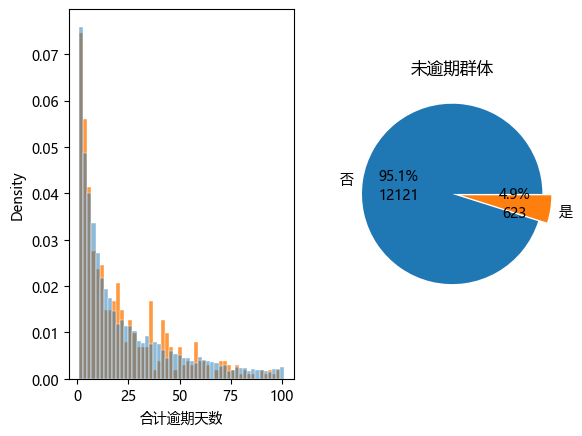

In [89]:
fig, ax = plt.subplots(1, 2)
sns.histplot(ax = ax[0], x = day_data_1['合计逾期天数'], alpha = 0.8, color = 'tab:orange', edgecolor = 'w', stat = 'density', binwidth = 2, binrange=(1, 100))
sns.histplot(ax = ax[0], x = day_data_0['合计逾期天数'], alpha = 0.5, color = 'tab:blue', edgecolor = 'w', stat = 'density', binwidth = 2, binrange=(1, 100))
total = def_data_na['是否逾期'].value_counts().tolist()
ax[1].pie(total, labels = ['否', '是'], autopct = fmt, explode = [0, 0.1])
ax[1].set_title('无记录群体');

可见在有过逾期记录的客户中，本次逾期的分布波动很大。在没有过逾期记录的客户中，逾期率低于普遍值。

## 第五部分 建模
1. 逻辑回归模型
2. 随机森林模型
3. XGBoost模型

In [105]:
# 将历史借贷记录和逾期记录并入总表
data_comb = pd.merge(data, def_data[['本期ID', '合计逾期天数', '合计逾期金额']], on = '本期ID', how = 'left')
data_comb = pd.merge(data_comb, his_data[['本期ID', '历史借贷次数']], on = '本期ID', how = 'left')
data_comb.head()

,本期ID,性别,学历,婚姻状况,职业类别,年收入,家庭人数,是否有车,是否有房,总贷款额度,征信查询次数,是否逾期,工龄,年龄分箱,贷款收入比,年收入log,总贷款额度log,合计逾期天数,合计逾期金额,历史借贷次数
0,100030,女,高中/职高,有配偶,清洁工,90000.0,2.0,0,1,225000.0,0.0,0,9.572603,50-60岁,2.500000,11.407565,12.323856,0.0,0.000000e+00,9.0
1,100037,女,高中/职高,有配偶,工人,90000.0,2.0,0,0,199008.0,2.0,0,12.065753,30-40岁,2.211200,11.407565,12.201100,0.0,0.000000e+00,2.0
2,100072,男,大学肄业,未婚,销售人员,180000.0,1.0,0,0,1080000.0,4.0,0,3.627397,20-30岁,6.000000,12.100712,13.892472,31.0,1.012500e+05,6.0
3,100085,男,高中/职高,有配偶,司机,157500.0,3.0,0,1,755190.0,0.0,0,6.093151,30-40岁,4.794857,11.967181,13.534725,0.0,0.000000e+00,1.0
4,100139,女,高中/职高,有配偶,未知,157500.0,3.0,0,0,302341.5,4.0,0,6.315068,30-40岁,1.919629,11.967181,12.619312,203.0,2.273737e-13,4.0


In [128]:
# 合计逾期天数和金额里有空值，为表示其特殊性，将其设为-1
data_comb['合计逾期天数'].fillna(-1, inplace = True)
data_comb['合计逾期金额'].fillna(-1, inplace = True)

In [129]:
# 导入所需要的python库
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# 定义类别变量名称
categorical_features = [
    '性别', '学历', '婚姻状况', '职业类别', '年龄分箱', '是否有车', '是否有房'
]
# 定义连续变量名称
continous_features = [
    '年收入log', '家庭人数', '总贷款额度log', '征信查询次数', '工龄', '合计逾期天数', '合计逾期金额', '历史借贷次数'
]
# 定义目标变量名称
target = "是否逾期"

# 将数据改成one-hot编码
X = pd.get_dummies(data_comb[continous_features + categorical_features], columns =categorical_features)
y = data_comb[target]

In [130]:
from sklearn.model_selection import train_test_split
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)
print('训练集里逾期用户占比: {:.1%}'.format(np.bincount(y_train)[1] / len(y_train)))
print('测试集里逾期用户占比: {:.1%}'.format(np.bincount(y_test)[1] / len(y_test)))

训练集里逾期用户占比: 8.4%
测试集里逾期用户占比: 8.4%


### 逻辑回归

In [131]:
# 逻辑回归模型
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() # 建立逻辑回归模型
logreg.fit(X_train, y_train) # 模型拟合

LogisticRegression()

逻辑回归模型的准确率为： 0.403954802259887
逻辑回归模型f1分数为： 0.18040569702201123
逻辑回归模型召回值分数为： 0.7798507462686567
逻辑回归模型准确率分数为： 0.10200097608589556
逻辑回归模型AUC分数为： 0.5746409317361104


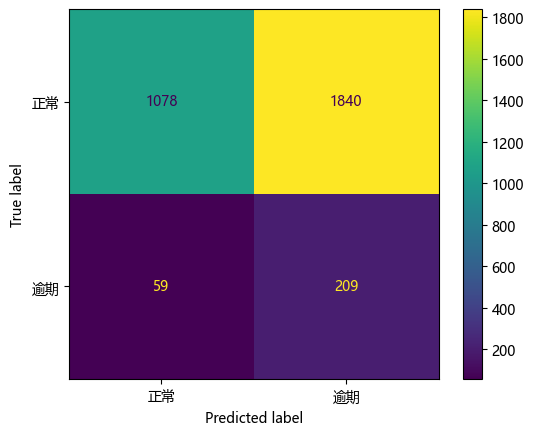

In [132]:
# 在测试集上测试结果
threshold = data[target].mean() # 定义阈值为均值

y_prob = logreg.predict_proba(X_test) # 预测概率
y_pred = (y_prob[:,1] > threshold) # 概率大于阈值的预测为1，否则为0

print('逻辑回归模型的准确率为：', accuracy_score(y_test, y_pred)) # 计算准确率
print('逻辑回归模型f1分数为：', f1_score(y_test, y_pred)) # 计算f1分数
print('逻辑回归模型召回值分数为：', recall_score(y_test, y_pred))  # 计算召回值分数
print('逻辑回归模型准确率分数为：', precision_score(y_test, y_pred)) # 计算准确率分数
print('逻辑回归模型AUC分数为：', roc_auc_score(y_test, y_pred)) # 计算AUC分数

cm = confusion_matrix(y_test, y_pred) # 计算混淆矩阵
disp = ConfusionMatrixDisplay( # 绘制混淆矩阵图
    confusion_matrix = cm, 
    display_labels = ['正常', '逾期']
)
disp.plot() # 绘制混淆矩阵图

### 随机森林

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42) # 初始化随机森林模型

params = { # 通过网格搜索，寻找最优参数
    "n_estimators": [100, 200, 300], # 决策树的数量
    "max_depth": [3, 4, 5] # 决策树的最大深度
}

rf_classifier = GridSearchCV( # 初始化网格搜索
    estimator = model, # 模型
    param_grid = params, # 参数
    scoring = 'roc_auc', # 评价指标
    cv = 5 # 交叉验证的折数
)

rf_classifier.fit(X_train, y_train) # 模型训练
print(rf_classifier.best_params_) # 输出最优参数

{'max_depth': 5, 'n_estimators': 200}


随机森林模型的准确率为： 0.5756434400502197
随机森林模型f1分数为： 0.2184971098265896
随机森林模型召回值分数为： 0.7052238805970149
随机森林模型准确率分数为： 0.1292749658002736
随机森林模型AUC分数为： 0.63448308491811


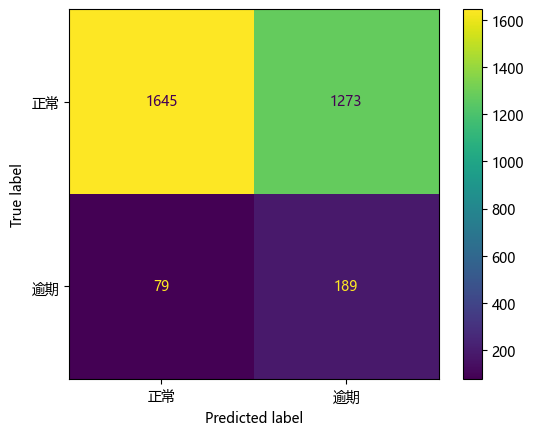

In [134]:
# testing result
threshold = data[target].mean() # 定义阈值为均值

y_prob = rf_classifier.predict_proba(X_test) # 预测概率
y_pred = (y_prob[:,1] > threshold) # 概率大于阈值的预测为1，否则为0

print('随机森林模型的准确率为：', accuracy_score(y_test, y_pred)) # 计算准确率
print('随机森林模型f1分数为：', f1_score(y_test, y_pred)) # 计算f1分数
print('随机森林模型召回值分数为：', recall_score(y_test, y_pred))  # 计算召回值分数
print('随机森林模型准确率分数为：', precision_score(y_test, y_pred)) # 计算准确率分数
print('随机森林模型AUC分数为：', roc_auc_score(y_test, y_pred)) # 计算AUC分数

cm = confusion_matrix(y_test, y_pred) # 计算混淆矩阵
disp = ConfusionMatrixDisplay( # 绘制混淆矩阵图
    confusion_matrix = cm, 
    display_labels = ['正常', '逾期']
)
disp.plot() # 绘制混淆矩阵图


### XGBoost

In [135]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier(random_state=42) # 初始化XGBoost模型

params = { # 通过网格搜索，寻找最优参数
    "n_estimators": [100, 200, 300], # 估计器个数
    "learning_rate": [0.1, 0.2, 0.3], # 学习率
    "max_depth": [3, 4, 5] # 树的最大深度
}

xgb_classifier = GridSearchCV( # 初始化网格搜索
    estimator = model, # 模型
    param_grid = params, # 参数
    scoring = 'roc_auc', # 评价指标
    cv = 5 # 交叉验证折数
)

xgb_classifier.fit(X_train, y_train) # 模型训练
print(xgb_classifier.best_params_) # 输出最优参数

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


XGBoost模型的准确率为： 0.6164469554300063
XGBoost模型f1分数为： 0.22264631043257
XGBoost模型召回值分数为： 0.6529850746268657
XGBoost模型准确率分数为： 0.13420245398773006
XGBoost模型AUC分数为： 0.6330381164772437


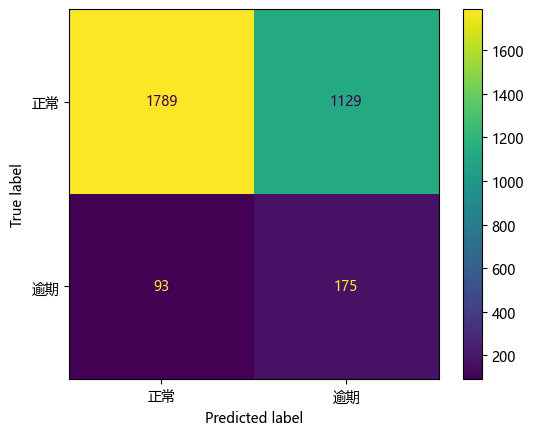

In [136]:
# testing result
threshold = data[target].mean() # 定义阈值为均值

y_prob = xgb_classifier.predict_proba(X_test) # 预测概率
y_pred = (y_prob[:,1] > threshold) # 概率大于阈值的预测为1，否则为0

print('XGBoost模型的准确率为：', accuracy_score(y_test, y_pred)) # 计算准确率
print('XGBoost模型f1分数为：', f1_score(y_test, y_pred)) # 计算f1分数
print('XGBoost模型召回值分数为：', recall_score(y_test, y_pred))  # 计算召回值分数
print('XGBoost模型准确率分数为：', precision_score(y_test, y_pred)) # 计算准确率分数
print('XGBoost模型AUC分数为：', roc_auc_score(y_test, y_pred)) # 计算AUC分数

cm = confusion_matrix(y_test, y_pred) # 计算混淆矩阵
disp = ConfusionMatrixDisplay( # 绘制混淆矩阵图
    confusion_matrix = cm, 
    display_labels = ['正常', '逾期']
)
disp.plot() # 绘制混淆矩阵图
